In [139]:
import pandas as pd
from pandas import DataFrame as df
from csv_reader import *
from csv_setup import *
from scipy import stats

In [140]:
dat = get_bike_sharing_df_clean()
dat

,hr,holiday,workingday,weathersit,atemp,hum,windspeed,cnt,no_snow,medium_snow,heavy_snow
0,0,0,0,1,0.2879,0.81,0.0000,16,0,0,1
1,1,0,0,1,0.2727,0.80,0.0000,40,0,0,1
2,2,0,0,1,0.2727,0.80,0.0000,32,0,0,1
3,3,0,0,1,0.2879,0.75,0.0000,13,0,0,1
4,4,0,0,1,0.2879,0.75,0.0000,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
17374,19,0,1,2,0.2576,0.60,0.1642,119,0,1,0
17375,20,0,1,2,0.2576,0.60,0.1642,89,0,1,0
17376,21,0,1,1,0.2576,0.60,0.1642,90,0,1,0
17377,22,0,1,1,0.2727,0.56,0.1343,61,0,1,0


#### Removing target columns and date-day

In [141]:
dat_nodate = dat.drop(['cnt'], axis=1)

### Finding variance in all columns

In [142]:
## Season is redundant given month and same goes for instant and hr
# dat_nodate = dat_nodate.drop(['season', 'instant', 'yr'], axis=1)

In [143]:
vars = dat_nodate.var().sort_values(ascending=False)
vars

hr             47.808998
weathersit      0.408777
no_snow         0.249988
medium_snow     0.222940
workingday      0.216626
heavy_snow      0.133991
hum             0.037222
atemp           0.029532
holiday         0.027944
windspeed       0.014967
dtype: float64

### Finding correlation with target variable

In [144]:
corrs = dat_nodate.apply(lambda x: x.corr(dat.cnt)).abs().sort_values(ascending=False)
corrs

atemp          0.400929
hr             0.394071
hum            0.322911
no_snow        0.240614
heavy_snow     0.206725
weathersit     0.142426
medium_snow    0.094527
windspeed      0.093234
holiday        0.030927
workingday     0.030284
dtype: float64

In [145]:
corrs_sort = corrs.abs().sort_values(ascending=False)
corrs_sort

atemp          0.400929
hr             0.394071
hum            0.322911
no_snow        0.240614
heavy_snow     0.206725
weathersit     0.142426
medium_snow    0.094527
windspeed      0.093234
holiday        0.030927
workingday     0.030284
dtype: float64

#### Get columns that correlate more with the target variable

In [146]:
sel_cols = vars[:]
sel_col_names = sel_cols.keys().tolist()

In [147]:
sel_dat = dat[sel_col_names]
sel_dat

,hr,weathersit,no_snow,medium_snow,workingday,heavy_snow,hum,atemp,holiday,windspeed
0,0,1,0,0,0,1,0.81,0.2879,0,0.0000
1,1,1,0,0,0,1,0.80,0.2727,0,0.0000
2,2,1,0,0,0,1,0.80,0.2727,0,0.0000
3,3,1,0,0,0,1,0.75,0.2879,0,0.0000
4,4,1,0,0,0,1,0.75,0.2879,0,0.0000
...,...,...,...,...,...,...,...,...,...,...
17374,19,2,0,1,1,0,0.60,0.2576,0,0.1642
17375,20,2,0,1,1,0,0.60,0.2576,0,0.1642
17376,21,1,0,1,1,0,0.60,0.2576,0,0.1642
17377,22,1,0,1,1,0,0.56,0.2727,0,0.1343


#### Plotting output with respect to each input

In [148]:
from matplotlib import pyplot as plt


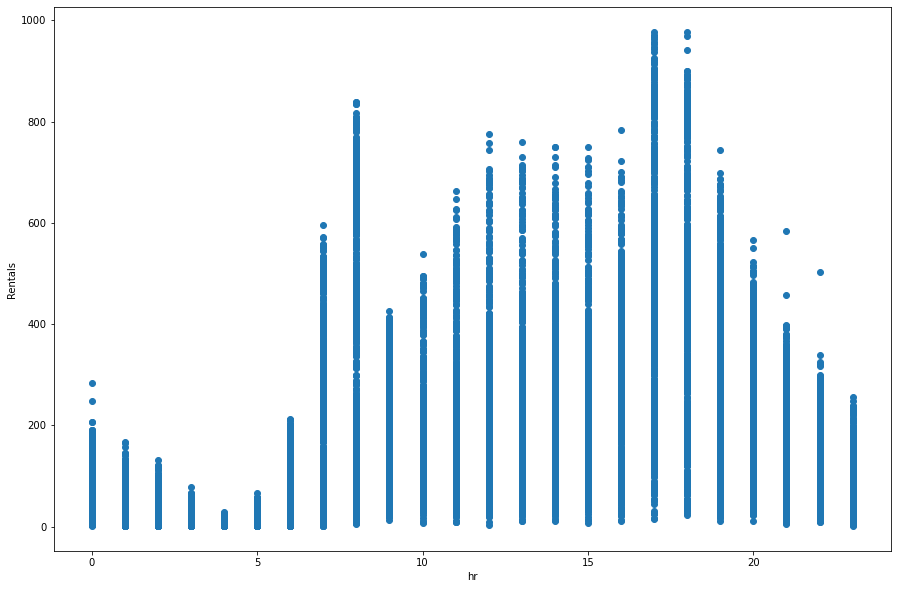

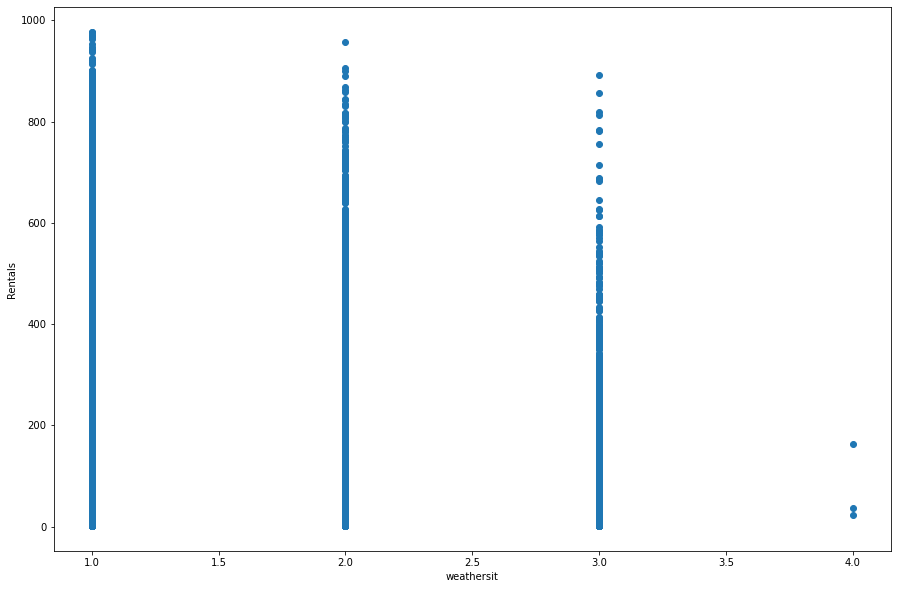

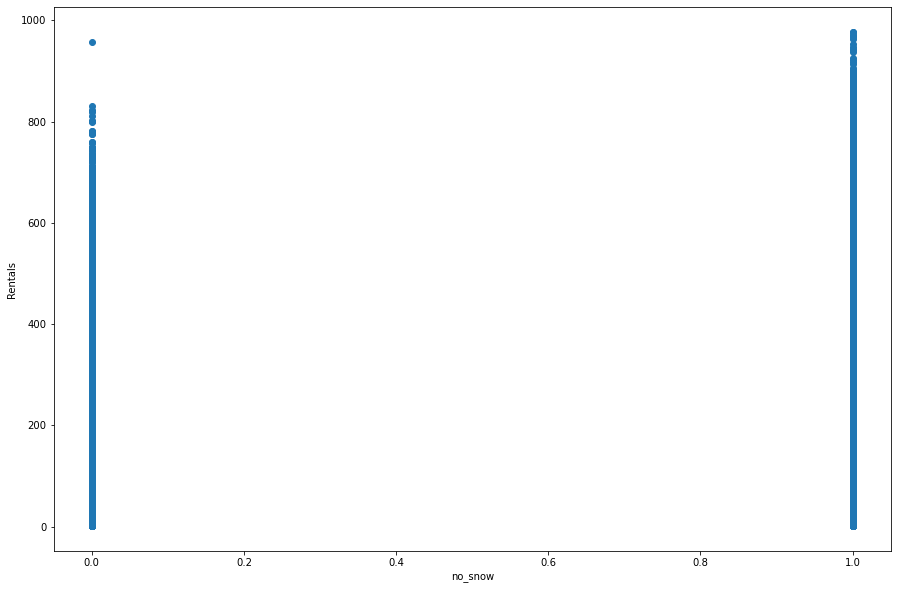

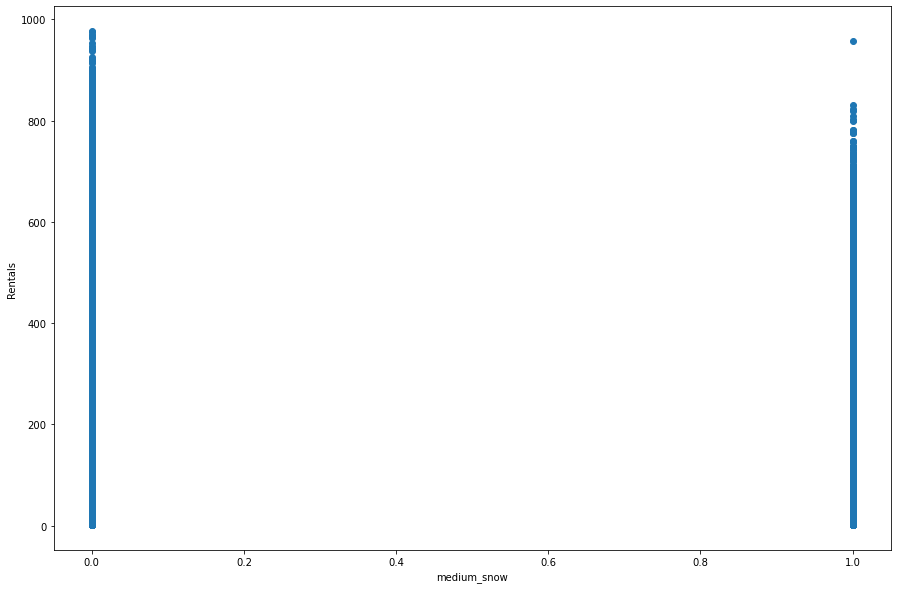

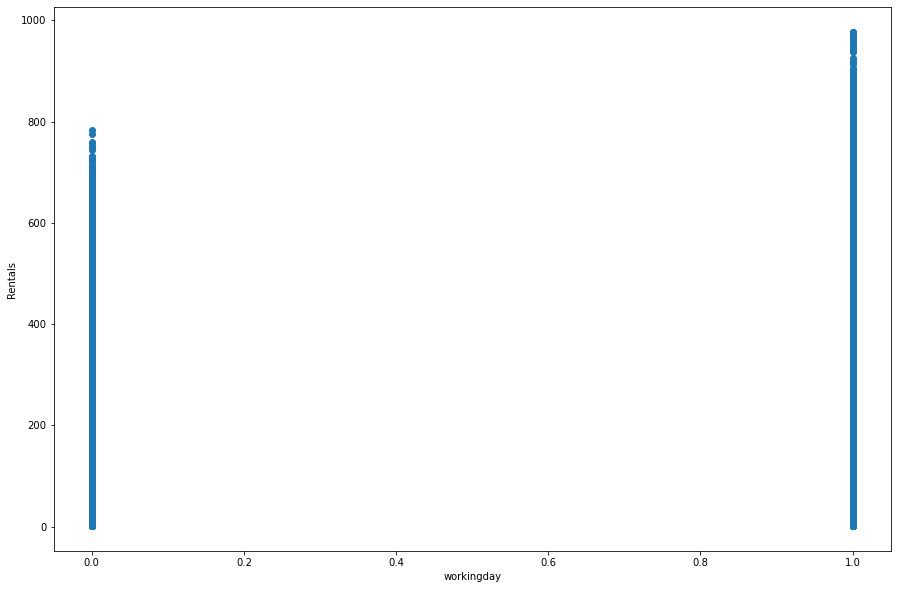

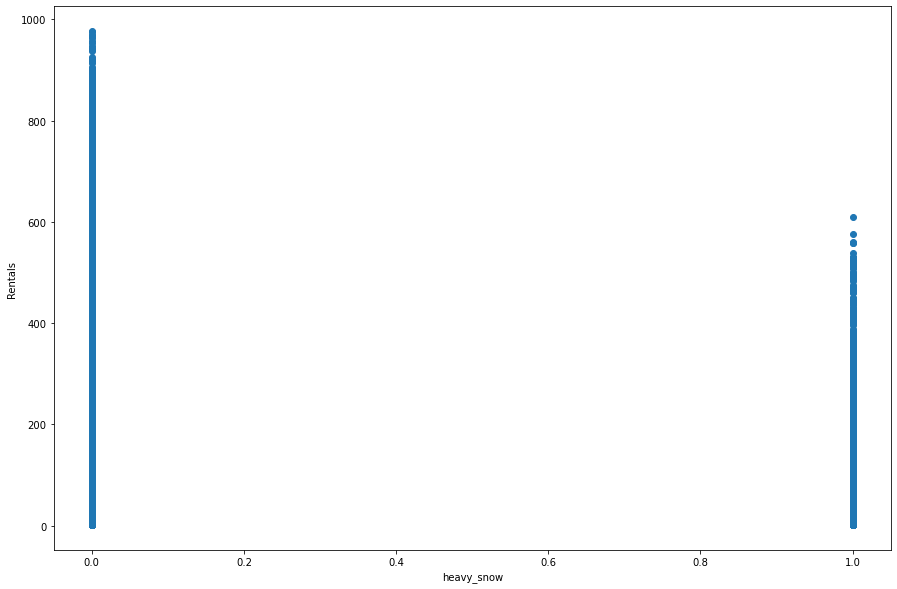

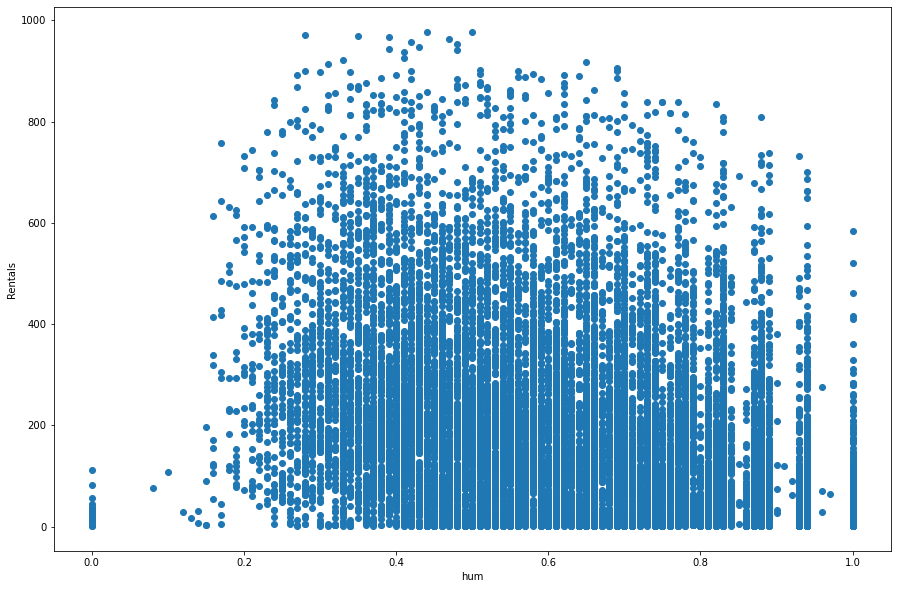

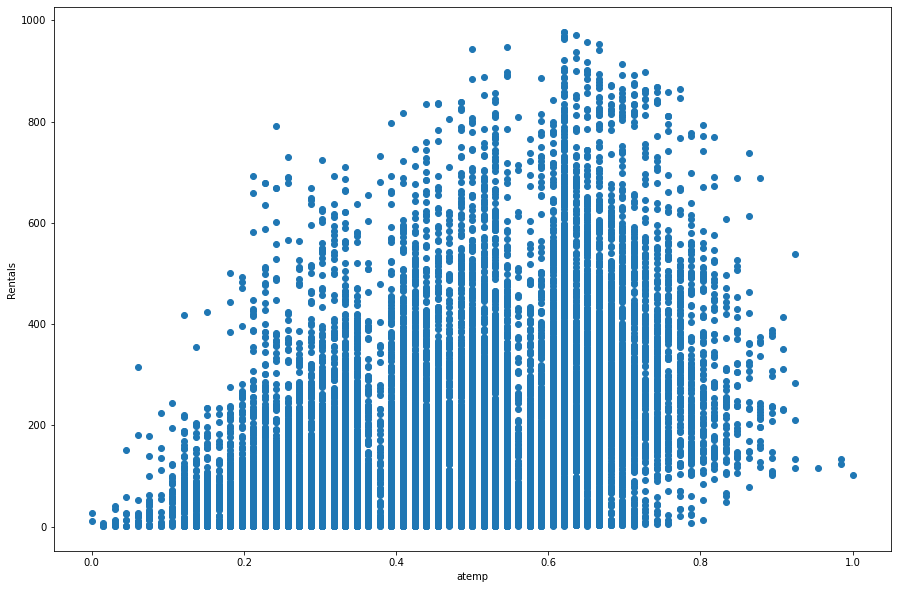

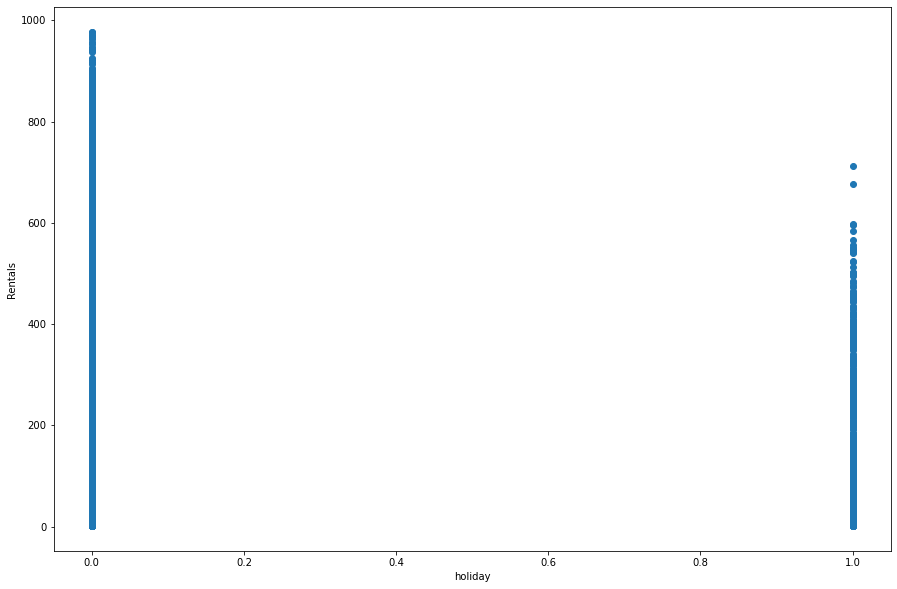

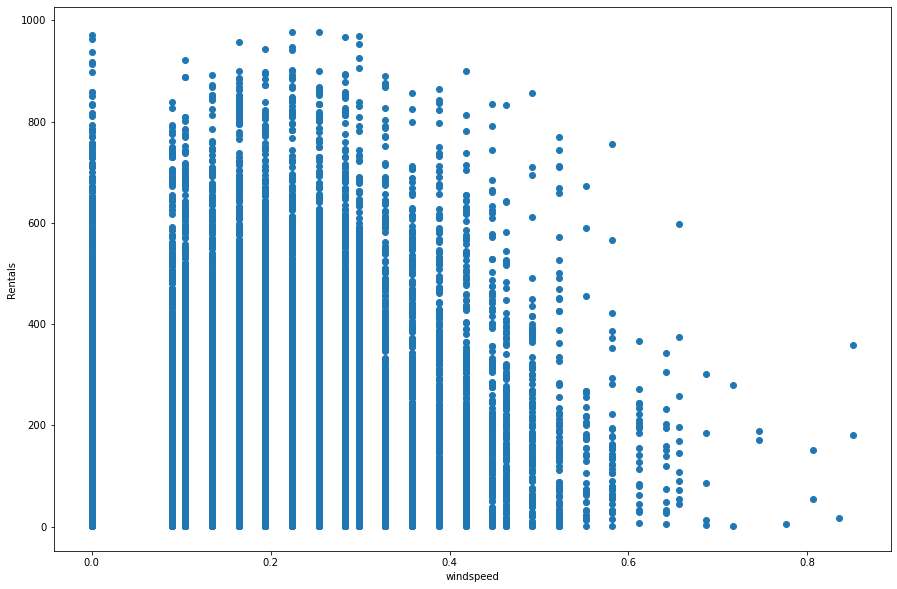

In [149]:
for col in sel_dat:
  plt.figure(figsize=(15,10))
  plt.scatter(sel_dat[col], dat['cnt'])
  plt.xlabel(col)
  plt.ylabel('Rentals')
plt.show()

## Training Polynomial Regression Model

In [150]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
import numpy as np

#### Data Normalization

In [151]:
sel_dat_norm = (sel_dat - sel_dat.mean()) / sel_dat.std()
sel_dat_norm

,hr,weathersit,no_snow,medium_snow,workingday,heavy_snow,hum,atemp,holiday,windspeed
0,-1.669956,-0.665174,-1.010324,-0.710476,-1.466858,2.296455,0.947345,-1.093249,-0.172107,-1.553844
1,-1.525330,-0.665174,-1.010324,-0.710476,-1.466858,2.296455,0.895513,-1.181698,-0.172107,-1.553844
2,-1.380705,-0.665174,-1.010324,-0.710476,-1.466858,2.296455,0.895513,-1.181698,-0.172107,-1.553844
3,-1.236079,-0.665174,-1.010324,-0.710476,-1.466858,2.296455,0.636351,-1.093249,-0.172107,-1.553844
4,-1.091454,-0.665174,-1.010324,-0.710476,-1.466858,2.296455,0.636351,-1.093249,-0.172107,-1.553844
...,...,...,...,...,...,...,...,...,...,...
17374,1.077931,0.898898,-1.010324,1.407426,0.681690,-0.435429,-0.141133,-1.269565,-0.172107,-0.211685
17375,1.222556,0.898898,-1.010324,1.407426,0.681690,-0.435429,-0.141133,-1.269565,-0.172107,-0.211685
17376,1.367182,-0.665174,-1.010324,1.407426,0.681690,-0.435429,-0.141133,-1.269565,-0.172107,-0.211685
17377,1.511807,-0.665174,-1.010324,1.407426,0.681690,-0.435429,-0.348463,-1.181698,-0.172107,-0.456086


In [152]:
comb_dat = sel_dat_norm.copy()
comb_dat['cnt'] = dat['cnt']
comb_dat

,hr,weathersit,no_snow,medium_snow,workingday,heavy_snow,hum,atemp,holiday,windspeed,cnt
0,-1.669956,-0.665174,-1.010324,-0.710476,-1.466858,2.296455,0.947345,-1.093249,-0.172107,-1.553844,16
1,-1.525330,-0.665174,-1.010324,-0.710476,-1.466858,2.296455,0.895513,-1.181698,-0.172107,-1.553844,40
2,-1.380705,-0.665174,-1.010324,-0.710476,-1.466858,2.296455,0.895513,-1.181698,-0.172107,-1.553844,32
3,-1.236079,-0.665174,-1.010324,-0.710476,-1.466858,2.296455,0.636351,-1.093249,-0.172107,-1.553844,13
4,-1.091454,-0.665174,-1.010324,-0.710476,-1.466858,2.296455,0.636351,-1.093249,-0.172107,-1.553844,1
...,...,...,...,...,...,...,...,...,...,...,...
17374,1.077931,0.898898,-1.010324,1.407426,0.681690,-0.435429,-0.141133,-1.269565,-0.172107,-0.211685,119
17375,1.222556,0.898898,-1.010324,1.407426,0.681690,-0.435429,-0.141133,-1.269565,-0.172107,-0.211685,89
17376,1.367182,-0.665174,-1.010324,1.407426,0.681690,-0.435429,-0.141133,-1.269565,-0.172107,-0.211685,90
17377,1.511807,-0.665174,-1.010324,1.407426,0.681690,-0.435429,-0.348463,-1.181698,-0.172107,-0.456086,61


#### Fitting the data with 4th degree Polynomial

In [157]:
n_train = round(len(comb_dat)*0.7)
#X = comb_dat.iloc[:, :-1] 
#y = comb_dat['cnt'] 

X =  dat.drop(['cnt'], axis=1)
y =  dat.cnt
X_train, X_test, y_train, y_test = X[:n_train].to_numpy(), X[n_train:].to_numpy(), y[:n_train].to_numpy(na_value = 0), y[n_train:].to_numpy()

type(y)
y

0         16
1         40
2         32
3         13
4          1
        ... 
17374    119
17375     89
17376     90
17377     61
17378     49
Name: cnt, Length: 17379, dtype: int64

In [163]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

tscv = TimeSeriesSplit(n_splits=5)
print(tscv)
fold = 1
#TimeSeriesSplit(gap=0, max_train_size=None, n_splits=, test_size=None)
for train, test in tscv.split(X):
    train_end = train[-1]
    test_start = test[0]
    test_end = test[-1]    
    X_train = X[:train_end].to_numpy()
    X_test = X[test_start:test_end].to_numpy()
    y =  dat.cnt
    #print(type(y))
    y_train = y[:train_end].to_numpy()
    y_test = y[test_start:test_end].to_numpy()
    print("***********************************************************************************")
    print("***********************************FOLD ", fold ,"******************************************")
    print("Train X Size", "Test X Size", "Train Y Size", "Test Y Size")
    print(X_train.shape,"  ", X_test.shape, "  ",  y_train.shape, "  ", y_test.shape )
    print("%s %s" % (train, test))
    
    fold = fold + 1

    dictlist = [dict() for x in range(5)]

    x = 0

    for i in dictlist:

        poly = PolynomialFeatures(degree=x+1)  # Fitting nth degree polynomial on input features
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly =  poly.fit_transform(X_test)

        #poly_var_train, poly_var_test, res_train, res_test = train_test_split(poly_variables, train_dat['cnt'].values, test_size = 0.33, random_state = 1)

        regression = linear_model.LinearRegression()  # Linear Regression with the fitted polynomial


        model = regression.fit(X_train_poly, y_train)
        score = model.score(X_test_poly, y_test)
        #print("score : ", score)

        preds = model.predict(X_test_poly)
        #preds = np.around(preds).astype(np.int32).tolist()  # rounding off to integer values since bike rentals can only be integers
        mse_train =  mean_squared_error(y_train, model.predict(X_train_poly))
        mse_test = mean_squared_error(y_test, preds)
        print("Degree of Polynomial: ", x+1, "score : ", score, "MSE_Test : ", mse_test, "MSE_train : ", mse_train )

        y = dictlist[x]
        y['degree'] = x+1
        y['poly_var_train'] = X_train_poly
        y['poly_var_test'] =  X_test_poly
        y['res_train'] = y_train
        y['res_test'] = y_test
        y['model'] = model
        y['score'] = score
        y['preds'] = preds
        y['MSE_Test'] = mse_test

        x= x+1
    

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
***********************************************************************************
***********************************FOLD  1 ******************************************
Train X Size Test X Size Train Y Size Test Y Size
(2898, 10)    (2895, 10)    (2898,)    (2895,)
[   0    1    2 ... 2896 2897 2898] [2899 2900 2901 ... 5792 5793 5794]
Degree of Polynomial:  1 score :  0.23930639122485542 MSE_Test :  17145.13140933633 MSE_train :  5369.78207593992
Degree of Polynomial:  2 score :  0.030978642234941622 MSE_Test :  21840.591699050827 MSE_train :  3740.783133993266
Degree of Polynomial:  3 score :  -4.515015560865046 MSE_Test :  124301.90739714217 MSE_train :  3173.77723821657
Degree of Polynomial:  4 score :  -254455592357.09064 MSE_Test :  5735127150397231.0 MSE_train :  2547.5242145305197
Degree of Polynomial:  5 score :  -11739152571.523169 MSE_Test :  264586570951001.75 MSE_train :  2031.1089228319615
**********

In [ ]:
train[-1]

In [ ]:
type(y)

In [ ]:
y_train.shape, X_train.shape


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

dictlist = [dict() for x in range(5)]

x = 0

for i in dictlist:
    
    poly = PolynomialFeatures(degree=x+1)  # Fitting nth degree polynomial on input features
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly =  poly.fit_transform(X_test)

    #poly_var_train, poly_var_test, res_train, res_test = train_test_split(poly_variables, train_dat['cnt'].values, test_size = 0.33, random_state = 1)
    
    regression = linear_model.LinearRegression()  # Linear Regression with the fitted polynomial

    
    model = regression.fit(X_train_poly, y_train)
    score = model.score(X_test_poly, y_test)
    #print("score : ", score)
    
    preds = model.predict(X_test_poly)
    #preds = np.around(preds).astype(np.int32).tolist()  # rounding off to integer values since bike rentals can only be integers
    mse_train =  mean_squared_error(y_train, model.predict(X_train_poly))
    mse_test = mean_squared_error(y_test, preds)
    print("Degree of Polynomial: ", x+1, "score : ", score, "MSE_Test : ", mse_test, "MSE_train : ", mse_train )
    
    y = dictlist[x]
    y['degree'] = x+1
    y['poly_var_train'] = X_train_poly
    y['poly_var_test'] =  X_test_poly
    y['res_train'] = y_train
    y['res_test'] = y_test
    y['model'] = model
    y['score'] = score
    y['preds'] = preds
    y['MSE_Test'] = mse_test
    
    x= x+1
    

### Inference on Test Data

In [ ]:
#preds = model.predict(poly_var_test)
#preds = np.around(preds).astype(np.int32).tolist()  # rounding off to integer values since bike rentals can only be integers
#gt = res_test

##### Plotting first 100 values

In [ ]:
plt.figure(figsize=(20, 15))
plt.plot(range(100), dictlist[0]['preds'][:100], label='Degrree 1 Poly Prediction')
#plt.plot(range(10), dictlist[1]['preds'][:10], label='Degrree 2 Poly Prediction')
#plt.plot(range(10), dictlist[2]['preds'][:10], label='Degrree 3 Poly Prediction')
plt.plot(range(100), dictlist[3]['preds'][:100], label='Degrree 4 Poly Prediction')
plt.plot(range(100), dictlist[4]['preds'][:100], label='Degrree 5 Poly Prediction')
plt.plot(range(100), dictlist[5]['preds'][:100], label='Degrree 6 Poly Prediction')
plt.plot(range(100), gt[:100], label='ground truth')
plt.legend()
plt.show()